In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
import pandas as pd

In [ ]:
# %load housing.names
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.





In [4]:
names = ['crim', 'zn', 'indis', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstas','medv']

In [5]:
data = pd.read_csv('housing.data', delim_whitespace=True, names= names)

In [10]:
data.shape

(506, 14)

In [6]:
data.head()

,crim,zn,indis,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstas,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indis    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstas    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indis,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [11]:
data.isnull().sum()

crim       0
zn         0
indis      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstas      0
medv       0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
data_scalar = MinMaxScaler().fit_transform(data)

In [14]:
data_scalar.shape

(506, 14)

In [15]:
dataScale = pd.DataFrame(data_scalar, columns=names)

In [16]:
dataScale.head()

,crim,zn,indis,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstas,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [17]:
dataScale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.0
zn,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.0
indis,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.0
chas,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.0
nox,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.0
rm,506.0,0.521869,0.134627,0.0,0.445392,0.507281,0.586798,1.0
age,506.0,0.676364,0.289896,0.0,0.433831,0.768280,0.938980,1.0
dis,506.0,0.242381,0.191482,0.0,0.088259,0.188949,0.369088,1.0
rad,506.0,0.371713,0.378576,0.0,0.130435,0.173913,1.000000,1.0
tax,506.0,0.422208,0.321636,0.0,0.175573,0.272901,0.914122,1.0


In [18]:
import matplotlib.pyplot as plt

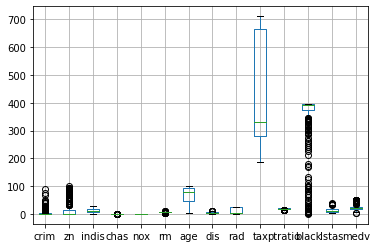

In [20]:
data.boxplot(column=names)

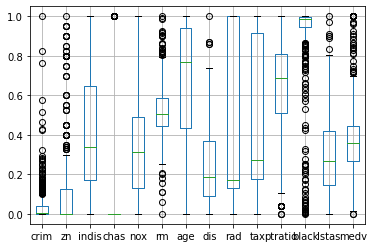

In [21]:
dataScale.boxplot(column=names)

In [22]:
Cordata = dataScale.corr(method='pearson')

In [23]:
Cordata

,crim,zn,indis,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstas,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indis,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


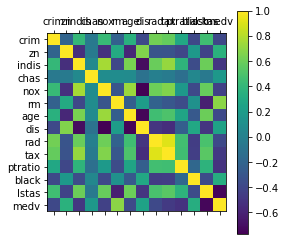

In [25]:
plt.matshow(Cordata)
plt.xticks(range(len(Cordata.columns)), Cordata.columns)
plt.yticks(range(len(Cordata.columns)), Cordata.columns)
plt.colorbar()

In [26]:
from sklearn.model_selection import train_test_split 

In [34]:
X = dataScale.drop('medv', axis=1)

In [35]:
Y = dataScale['medv']

In [36]:
X.shape, Y.shape

((506, 13), (506,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=5)

In [38]:
X_train.shape , X_test.shape

((354, 13), (152, 13))

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense

In [41]:
from tensorflow.keras  import metrics

In [42]:
model = Sequential()

In [43]:
model.add(Dense(20, input_dim=13, activation='relu'))

In [45]:
model.add(Dense(10, activation='relu'))

In [46]:
model.add(Dense(1, activation='linear'))

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train, y_train, epochs=1000 )

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.0141
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.0169
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.0169
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.0169
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.0226
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.0226
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.0226
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.0226
Epoch 9/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.0226
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.0226

12/12 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.0254
Epoch 83/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.0254
Epoch 84/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 0.0254
Epoch 85/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.0254
Epoch 86/1000
12/12 [==============================] - 0s 966us/step - loss: 0.0058 - accuracy: 0.0254
Epoch 87/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.0254
Epoch 88/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.0254
Epoch 89/1000
12/12 [==============================] - 0s 987us/step - loss: 0.0058 - accuracy: 0.0254
Epoch 90/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.0254
Epoch 91/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.0254


12/12 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.0254
Epoch 163/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.0254
Epoch 164/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.0254
Epoch 165/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.0254
Epoch 166/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.0282
Epoch 167/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.0254
Epoch 168/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.0254
Epoch 169/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.0254
Epoch 170/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 0.0254
Epoch 171/1000
12/12 [==============================] - 0s 996us/step - loss: 0.0046 - accuracy: 

12/12 [==============================] - 0s 869us/step - loss: 0.0041 - accuracy: 0.0254
Epoch 243/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.0254
Epoch 244/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.0282
Epoch 245/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.0254
Epoch 246/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.0254
Epoch 247/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.0254
Epoch 248/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.0254
Epoch 249/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.0254
Epoch 250/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.0254
Epoch 251/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 

12/12 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.0254
Epoch 323/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.0282
Epoch 324/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.0254
Epoch 325/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.0254
Epoch 326/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.0282
Epoch 327/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.0254
Epoch 328/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.0254
Epoch 329/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 0.0282
Epoch 330/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.0254
Epoch 331/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.

12/12 [==============================] - 0s 992us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 403/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.0282
Epoch 404/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.0282
Epoch 405/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.0282
Epoch 406/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.0282
Epoch 407/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.0282
Epoch 408/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.0282
Epoch 409/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.0282
Epoch 410/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.0282
Epoch 411/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 

12/12 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.0282
Epoch 483/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.0282
Epoch 484/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0282
Epoch 485/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 486/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 487/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 488/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0282
Epoch 489/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 490/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.0282
Epoch 491/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0282
Epoch 563/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0282
Epoch 564/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0282
Epoch 565/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0282
Epoch 566/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0282
Epoch 567/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0282
Epoch 568/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.0282
Epoch 569/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.0282
Epoch 570/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 571/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.

12/12 [==============================] - 0s 971us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 643/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0282
Epoch 644/1000
12/12 [==============================] - 0s 969us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 645/1000
12/12 [==============================] - 0s 938us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 646/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0282
Epoch 647/1000
12/12 [==============================] - 0s 900us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 648/1000
12/12 [==============================] - 0s 985us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 649/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.0282
Epoch 650/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0282
Epoch 651/1000
12/12 [==============================] - 0s 1000us/step - loss: 0.0028 -

12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 723/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 724/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282    
Epoch 725/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 726/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 0.0282
Epoch 727/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.0282
Epoch 728/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 729/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 730/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.0282
Epoch 731/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy

12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 803/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 804/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 805/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 806/1000
12/12 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.03 - 0s 1ms/step - loss: 0.0024 - accuracy: 0.0282
Epoch 807/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0282
Epoch 808/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.0282
Epoch 809/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 810/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.0282
Epoch 811/1000
12/12 [==============================] -

12/12 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.0282
Epoch 882/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 883/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 884/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.0282
Epoch 885/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.0282
Epoch 886/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0282
Epoch 887/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.0282
Epoch 888/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 0.0282
Epoch 889/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 0.0282
Epoch 890/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.

12/12 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.0282
Epoch 962/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0282
Epoch 963/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.0282
Epoch 964/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.0282
Epoch 965/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0282
Epoch 966/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0282
Epoch 967/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0282    
Epoch 968/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0282
Epoch 969/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0282
Epoch 970/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy

In [50]:
y_pred = model.predict(X_test)

In [53]:
y_pred.shape

(152, 1)

In [57]:
(y_pred == y_test.values.reshape(-1,1)).sum()

0

In [61]:
y_pred[4]

array([0.61360925], dtype=float32)

In [64]:
y_test.iloc[4]

0.6711111111111111

In [51]:
score = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 731us/step - loss: 0.0094 - accuracy: 0.0461


In [52]:
score

[0.009439867921173573, 0.04605263099074364]

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
Lmodel = LinearRegression()

In [67]:
Lmodel.fit(X_train, y_train)

LinearRegression()

In [68]:
ly_pred = Lmodel.predict(X_test)

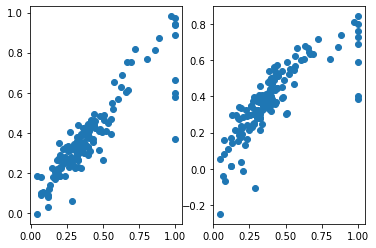

In [70]:
plt.figure(1)
plt.subplot(121)
plt.scatter(y_test, y_pred)

plt.subplot(122)
plt.scatter(y_test, ly_pred)

In [ ]:
plt.subplot(121)
plt.scatter(y_test, y_pred)